In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import renom as rm
from renom.optimizer import Sgd, Adam

In [2]:
class Model(rm.Model):
    def __init__(self):
        # 入力層のニューロンの数は自動的に推論される
        # 中間層のニューロンが10
        self.layer1 = rm.Dense(10)
        # 出力層のニューロンが3 labelのカラムが3だから
        self.layer2 = rm.Dense(3)

    def forward(self, x, epoch, batch):
        # 中間層の活性化関数はReLU
        t1 = rm.relu(self.layer1(x))
        out = self.layer2(t1)
        
        # Debug用
        if epoch is not None and epoch < 2 and batch < 3:
            print("epoch:{}  batch:{} weight shape:{} bias shape:{}".format(epoch, batch, self.layer1.params.w.shape, self.layer1.params.b.shape))
            print("weight:{}".format(self.layer1.params.w))
            print("bias:{}".format(self.layer1.params.b))
            print()
        return out

# Sequential Model にも同じような処理があり、そこに細かくコメントが記載してあるため、そちらを参照すること
# https://seattle-consulting.qiita.com/maejimayuto/items/0db599ac052cd2679c40
iris = load_iris()
data = iris.data
label = iris.target

model = Model()

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3)
# print(X_test)
# print(y_test)
# print(len(y_train))
y_train = y_train.reshape(len(X_train), -1)
y_test = y_test.reshape(len(X_test), -1)
# print(y_train)
batch_size = 8
epoch = 100
N = len(X_train)
# print(len(X_train))
optimizer = Sgd(lr=0.001)
learning_curve = []
test_learning_curve = []

for i in range(epoch):
#     print(N)
    perm = np.random.permutation(N)
#     perm = range(105)
#     perm = np.sort(perm)
#     print(perm)
    loss = 0
    for j in range(0, N // batch_size):
#         print(perm[j*batch_size : (j+1)*batch_size])
        train_batch = X_train[perm[j*batch_size : (j+1)*batch_size]]
#         print(train_batch)
        response_batch = y_train[perm[j*batch_size : (j+1)*batch_size]]

#         print("1----------------")
#         a = model.forward(train_batch, i, j)
#         print("a")å
#         print(type(a))
#         print(a)
#         print("2----------------")
#         なぜforwardで呼ばず、インスタンスの__call__の呼び出しをするのか
        with model.train():
            l = rm.softmax_cross_entropy(model(train_batch, i, j), response_batch)
#             print("l:{}".format(l))
#             print(type(l))
        grad = l.grad()
        grad.update(optimizer)
        loss += l.as_ndarray()
    train_loss = loss / (N // batch_size)

    test_loss = rm.softmax_cross_entropy(model(X_test, None, None), y_test).as_ndarray()
    test_learning_curve.append(test_loss)
    learning_curve.append(train_loss)
    print("epoch:{:03d}, train_loss:{:.4f}, test_loss:{:.4f}".format(i, float(train_loss), float(test_loss)))

epoch:0  batch:0 weight shape:(4, 10) bias shape:(1, 10)
weight:[[-0.29827434  0.21000847  0.2092475   0.17629714  0.11775687  0.10078679
  -0.16989267  0.434304   -0.46419695  0.41415146]
 [ 0.09677858  0.27148157 -0.83374274  0.53147715  0.33891159  0.10065224
  -0.23715487 -0.04857498  0.17717342  0.02978326]
 [ 0.4142431  -0.39110917  0.31385189  0.20074128  0.0111355   0.03012815
  -0.17707315  0.34429246  0.43995613 -0.13485508]
 [-0.07799219 -0.5901491  -0.25157365  0.23538105 -0.08147697 -0.65512246
   0.13359053  0.39780629  0.11927841 -0.22154915]]
bias:[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

epoch:0  batch:1 weight shape:(4, 10) bias shape:(1, 10)
weight:[[-0.30009472  0.20991647  0.20902288  0.1763203   0.11769663  0.10093229
  -0.16989267  0.43866056 -0.46381927  0.41211599]
 [ 0.09597535  0.27141944 -0.83383173  0.53122008  0.33852622  0.10079107
  -0.23715487 -0.04669712  0.1773551   0.0289955 ]
 [ 0.4128378  -0.39113766  0.31367275  0.20131841  0.01184087  0.03007369
  -0.17

epoch:085, train_loss:36.8414, test_loss:36.8414
epoch:086, train_loss:37.1956, test_loss:36.8414
epoch:087, train_loss:36.8414, test_loss:36.8414
epoch:088, train_loss:37.1956, test_loss:36.8414
epoch:089, train_loss:37.1956, test_loss:36.8414
epoch:090, train_loss:37.1956, test_loss:36.8414
epoch:091, train_loss:36.4871, test_loss:36.8414
epoch:092, train_loss:36.8414, test_loss:36.8414
epoch:093, train_loss:36.4871, test_loss:36.8414
epoch:094, train_loss:37.1956, test_loss:36.8414
epoch:095, train_loss:36.8414, test_loss:36.8414
epoch:096, train_loss:36.4871, test_loss:36.8414
epoch:097, train_loss:37.1956, test_loss:36.8414
epoch:098, train_loss:37.1956, test_loss:36.8414
epoch:099, train_loss:36.8414, test_loss:36.8414


In [3]:
# 実行できないため、コメントアウト
# 損失関数が現象してくことを確認したかった
# predictions = np.argmax(model(X_test).as_ndarray(), axis=1)

# print(confusion_matrix(y_test, predictions))
# print(classification_report(y_test, predictions))

# plt.plot(learning_curve, linewidth=1, label="train")
# plt.plot(test_learning_curve, linewidth=1, label="test")
# plt.title("learning_curve")
# plt.ylabel("error")
# plt.xlabel("epoch")
# plt.legend()
# plt.grid()
# plt.show()

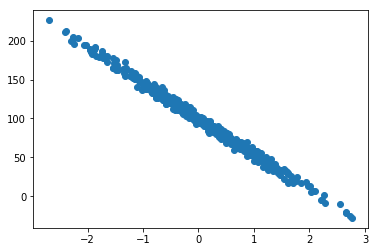

In [4]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# このマジックコメントがないとグラフは表示されない（by @azumag san）
%matplotlib inline

X, y = make_regression(n_samples=500, n_features=1, random_state=0, noise=4.0, bias=100.0)
X = - X
plt.scatter(X, y)
plt.show()

In [5]:
class Model(rm.Model):
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = rm.Variable(np.random.randn(input_size, hidden_size)*0.01)
        self.w2 = rm.Variable(np.random.randn(hidden_size, output_size)*0.01)

    def forward(self, x):
        t1 = rm.dot(x, self.w1)
        t2 = rm.relu(t1)
        out = rm.dot(t2, self.w2)
        return out

data, label = make_regression(n_samples=500, n_features=5, random_state=0, noise=4.0, bias=100.0)
data = - data

model = Model(input_size=data.shape[1], hidden_size=10, output_size=1)

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3)
y_train = y_train.reshape(len(X_train), -1)
y_test = y_test.reshape(len(X_test), -1)
batch_size = 8
epoch = 10
N = len(X_train)
optimizer = Sgd(lr=0.001)

for i in range(epoch):
    perm = np.random.permutation(N)
    loss = 0
    for j in range(0, N // batch_size):
        train_batch = X_train[perm[j*batch_size : (j+1)*batch_size]]
        response_batch = y_train[perm[j*batch_size : (j+1)*batch_size]]

        with model.train():
            l = rm.mean_squared_error(model(train_batch), response_batch)
        grad = l.grad()
        grad.update(optimizer)
        loss += l.as_ndarray()
    train_loss = loss / (N // batch_size)

    test_loss = rm.mean_squared_error(model(X_test), y_test).as_ndarray()
    print("epoch:{:03d}, train_loss:{:.4f}, test_loss:{:.4f}".format(i, float(train_loss), float(test_loss)))

epoch:000, train_loss:9896.2833, test_loss:7678.9565
epoch:001, train_loss:3226.4067, test_loss:1839.8363
epoch:002, train_loss:1784.2593, test_loss:1387.4137
epoch:003, train_loss:1427.8430, test_loss:1026.4895
epoch:004, train_loss:1220.3745, test_loss:891.5942
epoch:005, train_loss:919.0171, test_loss:720.9926
epoch:006, train_loss:718.2286, test_loss:647.1937
epoch:007, train_loss:679.0971, test_loss:593.7420
epoch:008, train_loss:646.2757, test_loss:627.7673
epoch:009, train_loss:605.6660, test_loss:559.5913


In [6]:
class Model(rm.Model):
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = rm.Variable(np.random.randn(input_size, hidden_size)*0.01)
        self.b1 = rm.Variable(np.zeros((1, hidden_size)))
        self.w2 = rm.Variable(np.random.randn(hidden_size, output_size)*0.01)
        self.b2 = rm.Variable(np.zeros((1, output_size)))

    def forward(self, x):
        t1 = rm.dot(x, self.w1) + self.b1
        t2 = rm.relu(t1)
        out = rm.dot(t2, self.w2) + self.b2
        return out

data, label = make_regression(n_samples=500, n_features=5, random_state=0, noise=4.0, bias=100.0)
data = - data

model = Model(input_size=data.shape[1], hidden_size=10, output_size=1)

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3)
y_train = y_train.reshape(len(X_train), -1)
y_test = y_test.reshape(len(X_test), -1)
batch_size = 8
epoch = 10
N = len(X_train)
optimizer = Sgd(lr=0.001)

for i in range(epoch):
    perm = np.random.permutation(N)
    loss = 0
    for j in range(0, N // batch_size):
        train_batch = X_train[perm[j*batch_size : (j+1)*batch_size]]
        response_batch = y_train[perm[j*batch_size : (j+1)*batch_size]]

        with model.train():
            l = rm.mean_squared_error(model(train_batch), response_batch)
        grad = l.grad()
        grad.update(optimizer)
        loss += l.as_ndarray()
    train_loss = loss / (N // batch_size)

    test_loss = rm.mean_squared_error(model(X_test), y_test).as_ndarray()
    print("epoch:{:03d}, train_loss:{:.4f}, test_loss:{:.4f}".format(i, float(train_loss), float(test_loss)))

epoch:000, train_loss:7949.1930, test_loss:1279.4160
epoch:001, train_loss:608.3815, test_loss:337.1844
epoch:002, train_loss:558.6528, test_loss:328.5977
epoch:003, train_loss:512.3202, test_loss:287.4895
epoch:004, train_loss:366.3749, test_loss:109.9870
epoch:005, train_loss:135.6646, test_loss:72.7759
epoch:006, train_loss:95.3820, test_loss:71.4679
epoch:007, train_loss:77.7823, test_loss:65.4372
epoch:008, train_loss:72.2682, test_loss:59.4398
epoch:009, train_loss:65.4304, test_loss:58.6941
